
#Supervised Learning Model Comparison

#Life Expectancy (WHO) Analysis

The WHO Life Expectancy dataset provides global statistics on life expectancy at birth and various ages, categorized by gender and health indicators. This analysis will involve comparing both regression and classification models. For regression, we will predict exact life expectancy values based on various features, while for classification, we will categorize countries as "developed" or "developing" based on the status column. We will evaluate model performance using metrics such as R² for regression and F1 score for classification. This dual approach will enhance our understanding of the factors influencing life expectancy and inform targeted public health strategies.

In [ ]:
 #Nessary Labraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Dataset Link :
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Life%20Expectancy%20Data.csv")

#Model Comparison Steps:-

#Initial Exploration and Pre-Processing

##Load the dataset

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df1 = df.copy()
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#dataset information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
#summary of descriptive statistics
df1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In the data set we have
- Maximum of  the year is 2015
- Minimum of the year is  2000
- Life expectancy is maximum 89
- Life expectancy is Minimum 36
- 50% of Alcohol 3.75
-  Average Polio	is 82.55

###Determine the number of unique values in the 'Country' and 'Year' columns.

In [ ]:
df1['Country'].nunique()

193

In [ ]:
df1['Year'].nunique()

16

###Analyze the distribution of values in the 'Status' column. If the dataset is imbalanced, consider using appropriate metrics for evaluation.

In [ ]:
# Value counts in 'Status' columns
status_distribution = df1['Status'].value_counts()
print("Distribution in 'Status' column:\n", status_distribution)
print("_"*25)
# Percentage distribution
status_percentage = df1['Status'].value_counts(normalize=True) * 100
print("\nPercentage distribution:\n", status_percentage)

Distribution in 'Status' column:
 Status
Developing    2426
Developed      512
Name: count, dtype: int64
_________________________

Percentage distribution:
 Status
Developing    82.573179
Developed     17.426821
Name: proportion, dtype: float64


###Check for any missing values. Impute missing values for all numerical columns using the median or another suitable strategy.

In [ ]:
df1.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
   if df1[col].isnull().sum() > 0:
        median_val = df1[col].median()
        df1[col].fillna(median_val, inplace=True)

/tmp/ipython-input-1339015417.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(median_val, inplace=True)


In [ ]:
df1.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


###Optionally, you may perform a comprehensive EDA to visualize relationships, distributions, and patterns in the data.

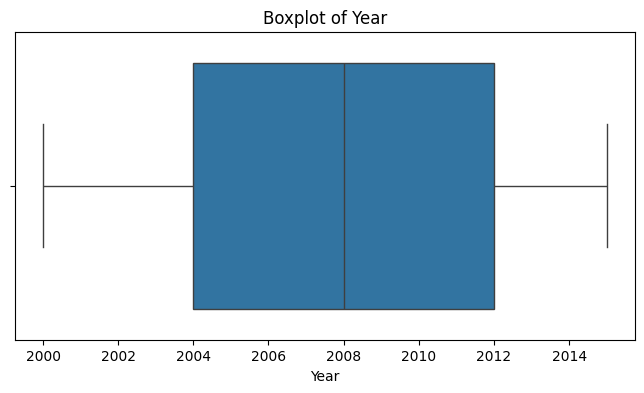

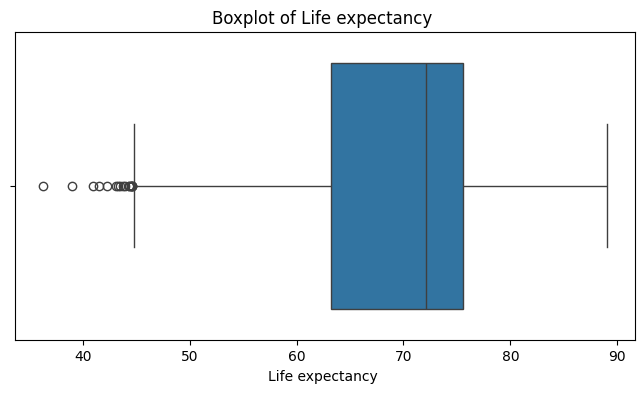

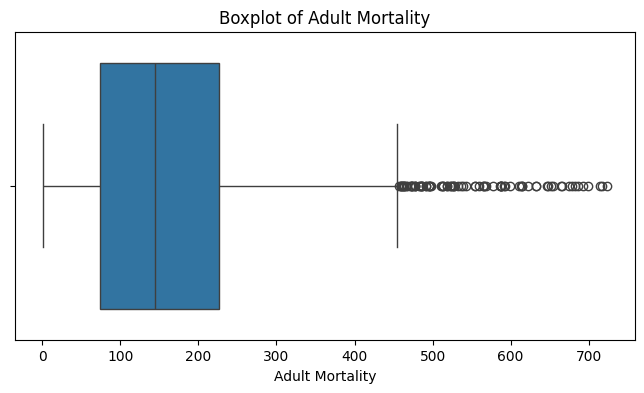

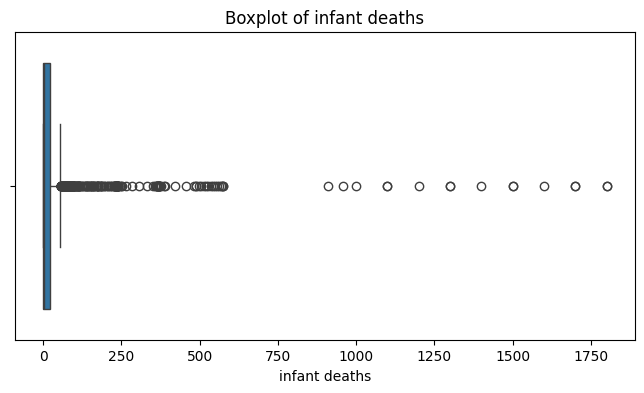

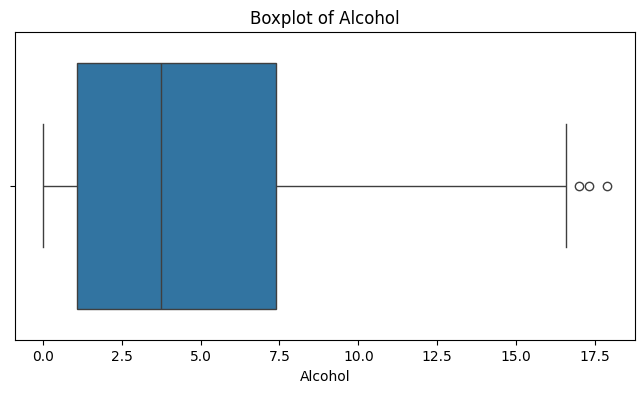

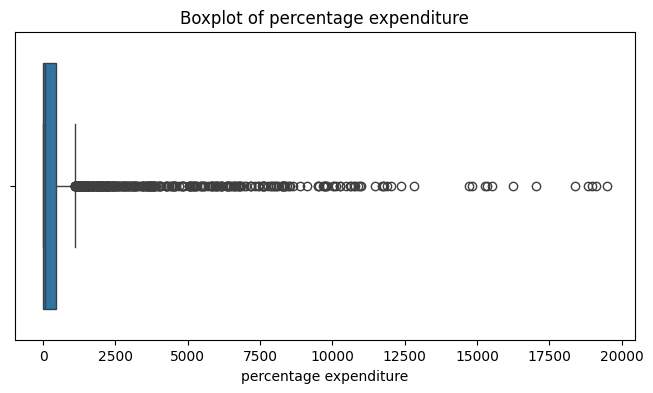

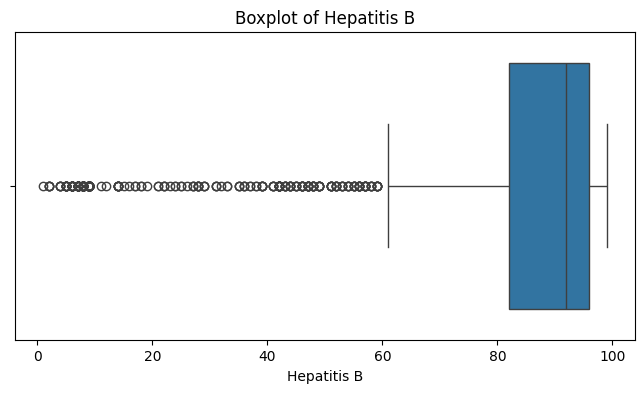

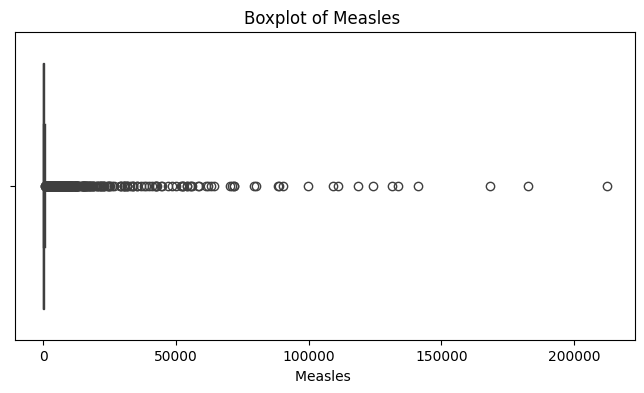

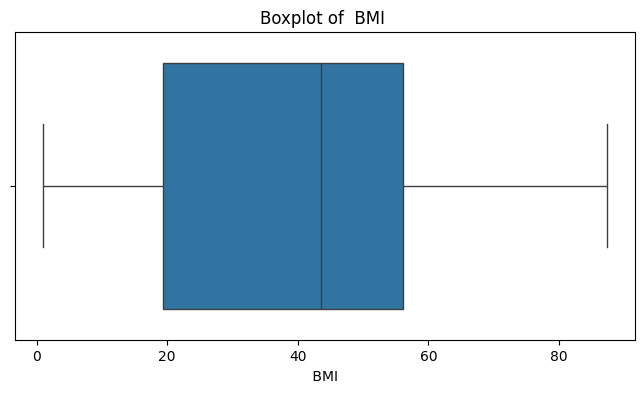

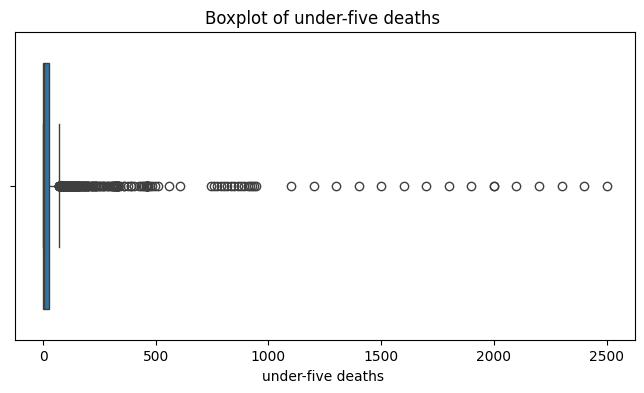

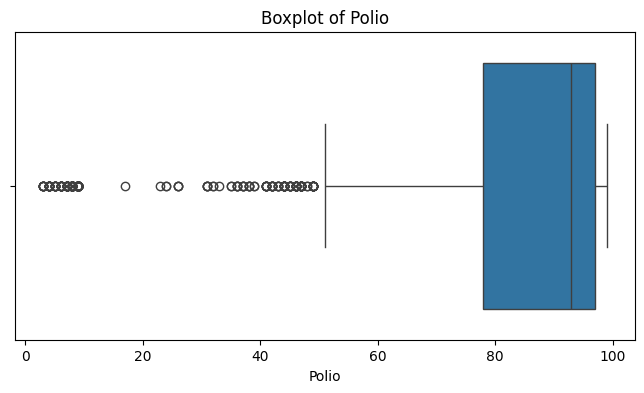

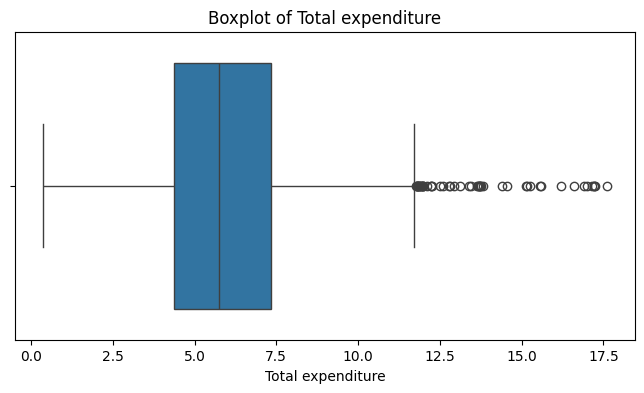

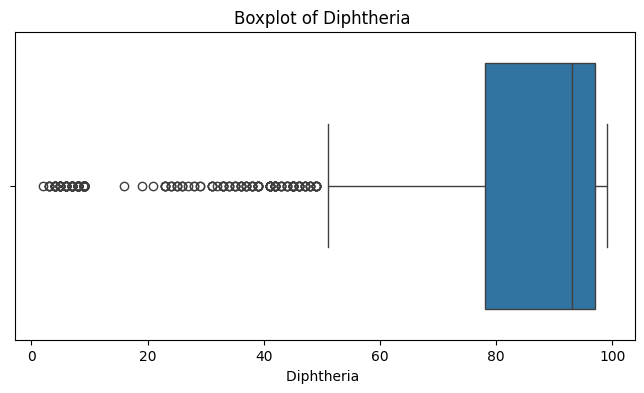

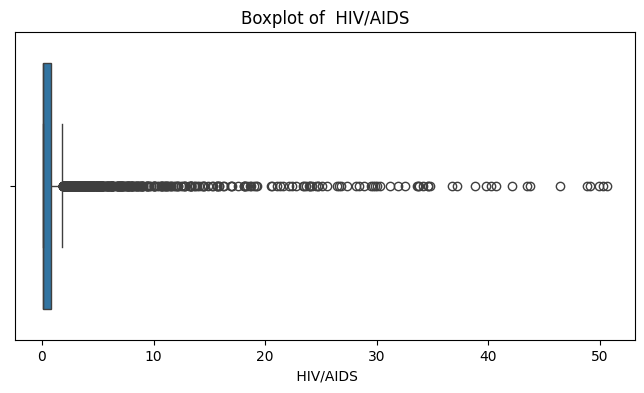

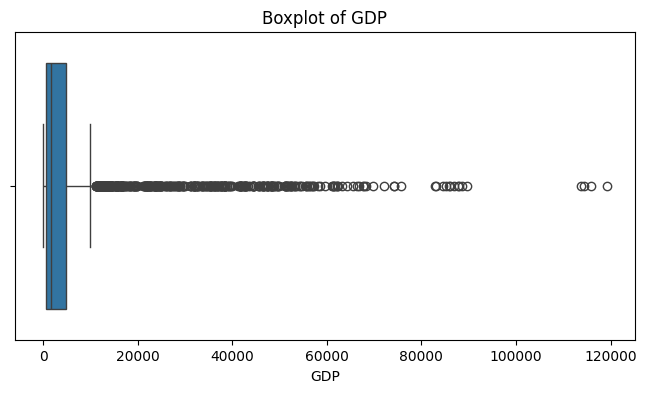

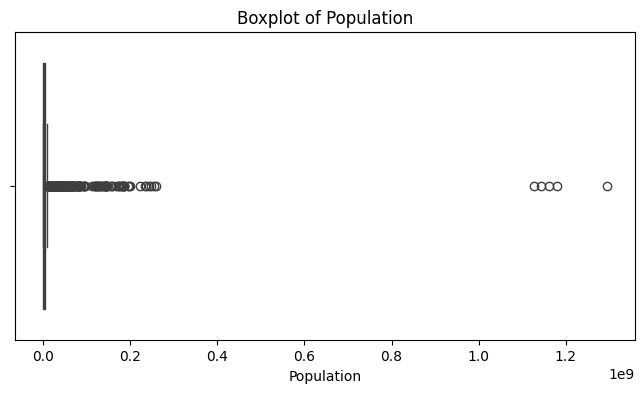

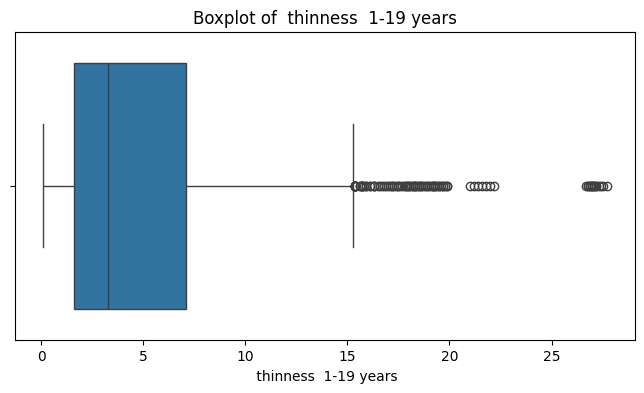

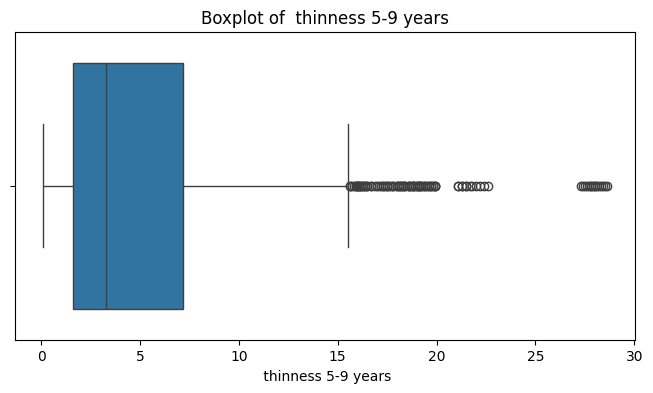

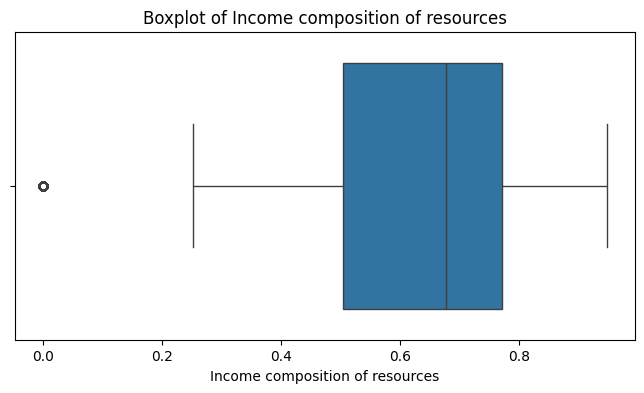

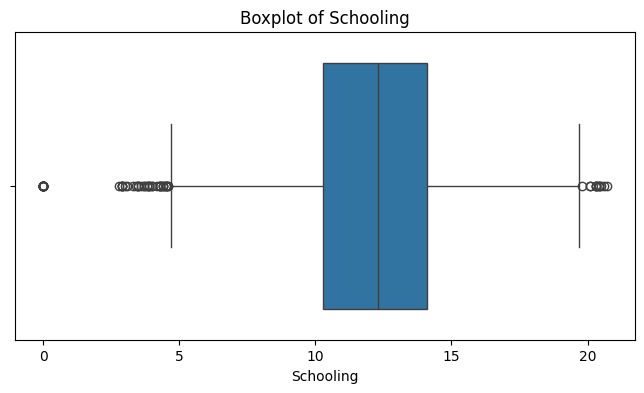

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

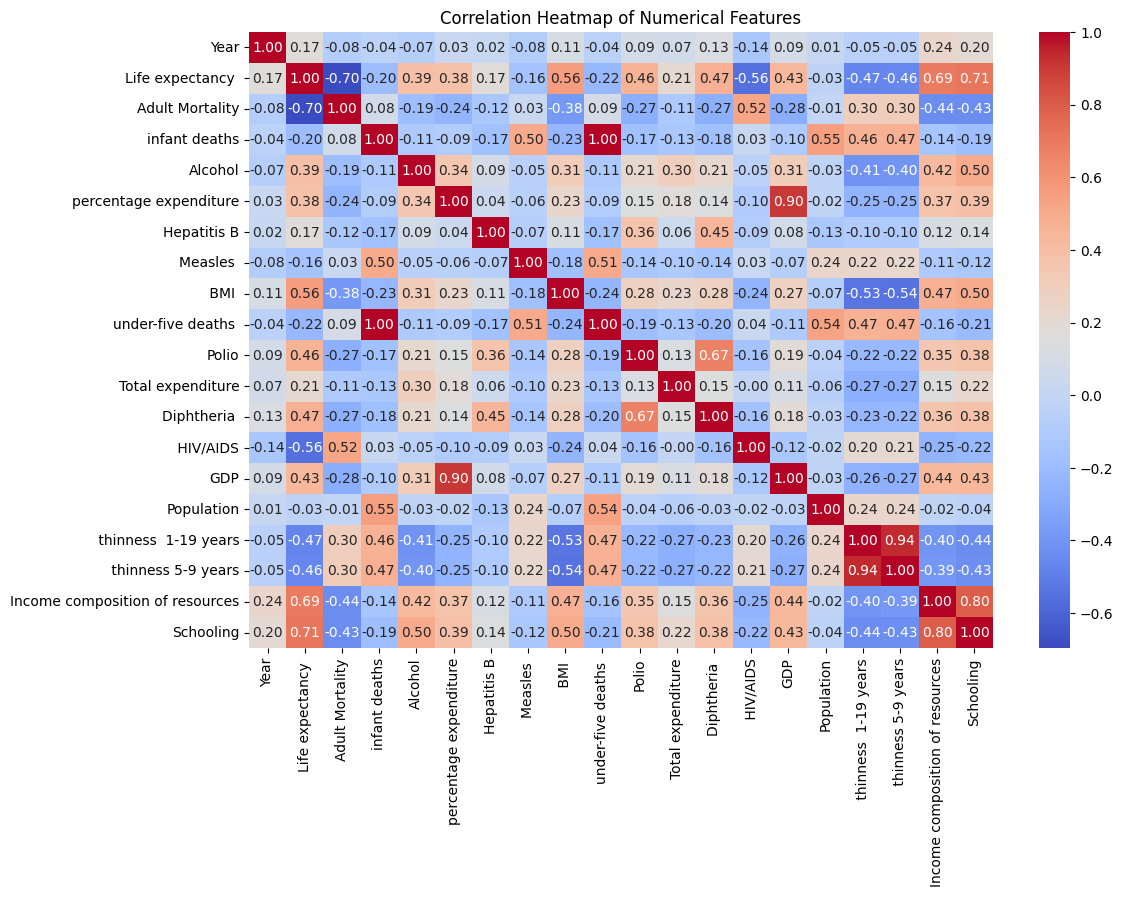

In [ ]:
plt.figure(figsize=(12, 8))
correlation = df1[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

###1.6.	Encode categorical columns appropriately.

In the dataset
- ***Country*** and ***Status*** are categorical column  so we do LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
le=LabelEncoder()
df1['Country'] = le.fit_transform(df1['Country'])

In [ ]:
df1['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df1['Status'] = le.fit_transform(df1['Status'])
print('\n'.join(['Developing - 0', 'Developed - 1']))

Developing - 0
Developed - 1


#2.	Classification Models Comparison

###Define 'Status' as the target variable and use all other columns as features.

In [ ]:
X=df1.drop('Status',axis=1) # X is Features
X.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
y = df1['Status'] # y is Target
y.head()

,Status
0,1
1,1
2,1
3,1
4,1


###Split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f" Dataset.shape : {df1.shape} ")
print(f" X_train.shape : {X_train.shape} ")
print(f" X_test.shape : {X_test.shape} ")
print(f" y_train.shape : {y_train.shape} ")
print(f" y_test.shape : {y_test.shape} ")

 Dataset.shape : (2938, 22) 
 X_train.shape : (2350, 21) 
 X_test.shape : (588, 21) 
 y_train.shape : (2350,) 
 y_test.shape : (588,) 


we are split orginal data set to
- X train and y train
- X test and y test
- 80% of data split into X train and y train for model Training
- 20% of data plit into  X test and y test for model testing

###Scale all feature columns, excluding 'Country' and 'Year'.

In [ ]:
non_scaled_columns = ['Country', 'Year']
X_scaled = X.drop(columns=non_scaled_columns)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[X_scaled.columns] = scaler.fit_transform(X_train[X_scaled.columns])
X_test_scaled[X_scaled.columns] = scaler.transform(X_test[X_scaled.columns])

###Compare classification models including Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, Random Forest Classifier, Support Vector Classifier, Gaussian Naive Bayes, and XGBoost. Report both accuracy and F1-scores for each model. Optionally, you may perform hyperparameter tuning to optimize model performance.

In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score,r2_score, mean_absolute_error, mean_squared_error

In [ ]:
models = {
    'Logistic Regression':LogisticRegression(solver='liblinear', max_iter=1000),
    'K-Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
results_df

,Model,Accuracy,F1 Score
3,Random Forest,0.993197,0.993169
1,K-Neighbors,0.972789,0.972187
2,Decision Tree,0.971088,0.971700
0,Logistic Regression,0.931973,0.933770
5,Gaussian NB,0.797619,0.821550
4,SVC,0.835034,0.759966


###Identify and report the best-performing classification model for this dataset.
Random Forest Classifier is the best-performing model on this dataset.
___
- Accuracy: 0.9931

- F1 Score: 0.9931

#3.	Regression Models Comparison

###Define 'Life expectancy' as the target variable and use all other columns as features.

In [ ]:
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
X=df1.drop('Life expectancy ',axis=1) # X is Features
y=df1['Life expectancy '] # y is Target

###Split the data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Scale all feature columns, excluding 'Country', 'Year', and 'Status'.

In [ ]:
non_scaled_columns = ['Country', 'Year', 'Status']
X_scaled = X.drop(columns=non_scaled_columns)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
X_train_scaled[X_scaled.columns] = scaler.fit_transform(X_train[X_scaled.columns])
X_test_scaled[X_scaled.columns] = scaler.transform(X_test[X_scaled.columns])

###Compare regression models including Linear Regression, Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor, and K-Neighbors Regressor. Report R² score and Mean Absolute Error for each model. Optionally, you may perform hyperparameter tuning to enhance performance.

In [ ]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'K-Neighbors': KNeighborsRegressor()}

regression_results = []

for name, model in regressors.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    regression_results.append({'Model': name, 'R² Score': r2, 'MAE': mae, "MSE": mse,})

regression_results_df = pd.DataFrame(regression_results).sort_values(by='R² Score', ascending=False)
regression_results_df

,Model,R² Score,MAE,MSE
2,Random Forest,0.966877,1.083889,2.870698
1,Decision Tree,0.920689,1.584694,6.873707
4,K-Neighbors,0.875122,2.274592,10.822852
0,Linear Regression,0.825307,2.845767,15.140179
3,SVR,-0.114584,7.496803,96.598047


###Identify and report the best-performing regression model for this dataset.

Random Forest Classifier is the best-performing model on this dataset.
___
- R² Score - 0.9668

- MAE - 1.083

- MSE - 2.870


#Unsupervised Learning – k-Means

##Customer Segmentation

The mall-customers dataset provides demographic and spending information about customers at a shopping mall, including features such as age, income, and spending score. This analysis will utilize k-Means clustering to segment customers into distinct groups based on their behaviors and characteristics. By identifying these segments, we can uncover patterns and insights that can inform targeted marketing strategies and improve customer experience. The results will help in understanding customer preferences and optimizing services to enhance engagement and satisfaction.


In [ ]:
#Dataset Link:
cs = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Mall_Customers.csv")
cs.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#k-Means Clustering Steps:

###Initial Visualization: Create a scatter plot using 'Annual Income (k$)' on the x-axis and 'Spending Score (1-100)' on the y-axis to visualize the data distribution.

In [ ]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


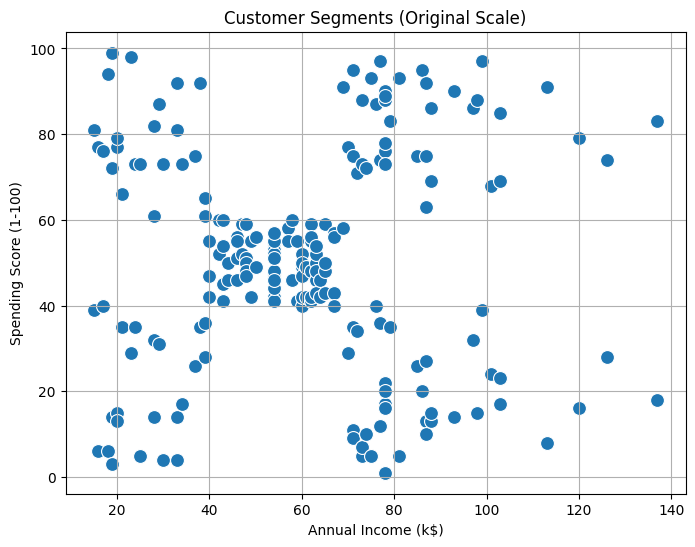

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=cs, x='Annual Income (k$)', y='Spending Score (1-100)',  s=100)
plt.title('Customer Segments (Original Scale)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

###Feature Selection: Select 'Annual Income (k$)' and 'Spending Score (1-100)' as the features for k-Means clustering.

In [ ]:
X = cs[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###Determine Optimal k-Value: Calculate the Within-Cluster Sum of Squares (WCSS) for a range of k-values.

In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [ ]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

###Plot the Elbow Chart: Plot the elbow method graph to visually determine the optimal k-value.

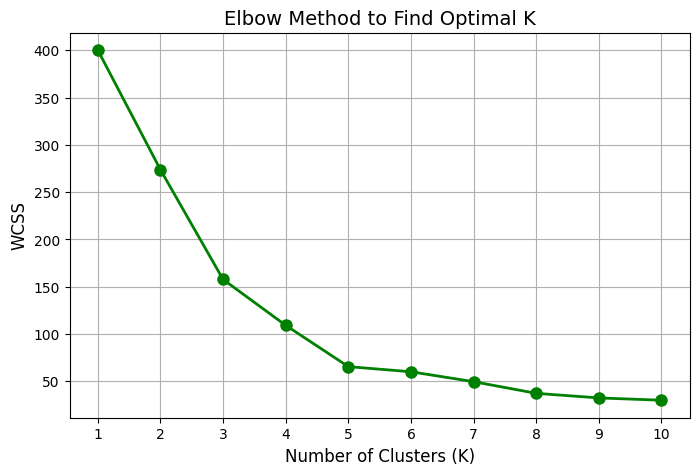

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, color='green', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Elbow Method to Find Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(True)
plt.xticks(K_range)
plt.show()

In the elbow method graph
- optimal k-value  is  ***5***

###Build k-Means Model:

- Construct the k-Means model using the optimal k-value determined in the previous step.

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

- Identify the clusters and centroids from the model.

In [ ]:
cs['Cluster'] = y_kmeans
cs['Cluster'].unique()

array([4, 2, 0, 1, 3], dtype=int32)

In [ ]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

###Visualization of Clusters: Plot the scatter plot again, this time including the centroids. Color the data points according to their respective clusters to visualize the clustering results effectively.

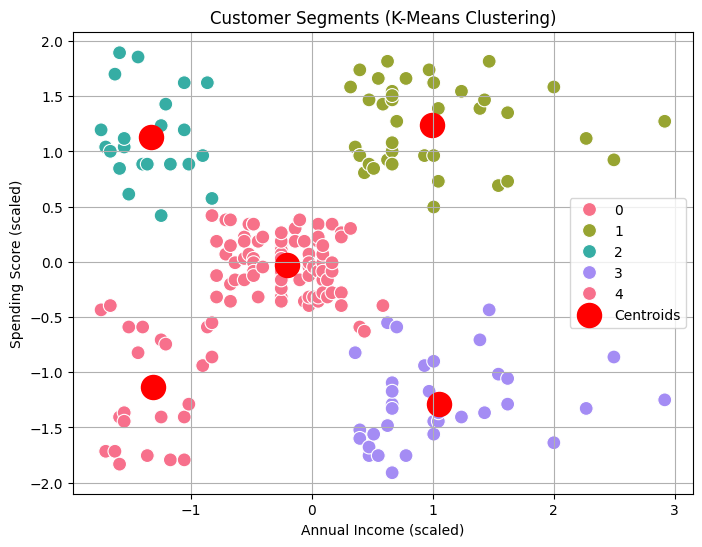

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='husl', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()